# Løsning til case oppgave (SPK)

## Del 1 (Analyse)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import date

### Lesing av datasettet

For å fortsette analysen og arbeidet med medlemsregisterdatasettet, vil jeg begynne med å importere det inn i Python ved hjelp av Pandas-biblioteket. Dette gjør det mulig å konvertere datasettet til et DataFrame-objekt, som er mer egnet for å utforske og manipulere dataene.

In [3]:
data_sett = pd.read_excel('Oppgavesett - Datagrunnlag medlemsregister og kontingent.xlsx', 
                   sheet_name=['Medlemmer', 'Regler for medlemstype', 'Regler for kontingent'] )
medlemmer_data = data_sett['Medlemmer']
medlemstype_data = data_sett['Regler for kontingent']
kontingent_data = data_sett['Regler for kontingent']

medlemmer_data

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Medlemstype,Gateadresse,Postnummer,Poststed
0,62,Sahra,AAS,28.03.1957,F,Veteran,Nytrøa,6166,Sæbø
1,87,Hanne,AASEN,22.05.1964,F,Senior,Krokveien,6399,Vestnes
2,99,Solveig,ABRAHAMSEN,08.05.1968,F,Senior,Langsæterlia,6687,Valsøyfjorden
3,71,Karen,AHMED,23.07.1960,F,Veteran,Rødalsveien,6239,Sykkylven
4,52,Emma,ALI,05.11.1951,F,Veteran,Sottdalen,6051,Valderøy
...,...,...,...,...,...,...,...,...,...
94,66,Maya,THOMASSEN,11.01.1958,F,senior,Sørsjølia,6210,Sylte
95,81,Susanne,THORSEN,24.05.2005,F,Junior,Klettvangveien,6310,Veblungsnes
96,97,Anne,TVEIT,30.01.1968,F,senior,Skibakkveien,6683,Vågland
97,78,Åse,VIK,25.06.1962,F,senior,Svartberget,6280,Søvik


### Data utforskning og visualisering

#### Formattering av tid

Når man bruker pandas er det viktig å ha kolonner som inneholder dato i et spesifikt format. Dette muligjør effektiv manipulering og analyse av tidsserie data, som for eksempel sortering, filtrering etter dato eller tid, og omfordeling for ulike tidsperioder. 

In [4]:
medlemmer_data['Fødselsdato'] = pd.to_datetime(medlemmer_data['Fødselsdato'], format='%d.%m.%Y', errors='coerce')
medlemmer_data.head()

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Medlemstype,Gateadresse,Postnummer,Poststed
0,62,Sahra,AAS,1957-03-28,F,Veteran,Nytrøa,6166,Sæbø
1,87,Hanne,AASEN,1964-05-22,F,Senior,Krokveien,6399,Vestnes
2,99,Solveig,ABRAHAMSEN,1968-05-08,F,Senior,Langsæterlia,6687,Valsøyfjorden
3,71,Karen,AHMED,1960-07-23,F,Veteran,Rødalsveien,6239,Sykkylven
4,52,Emma,ALI,1951-11-05,F,Veteran,Sottdalen,6051,Valderøy


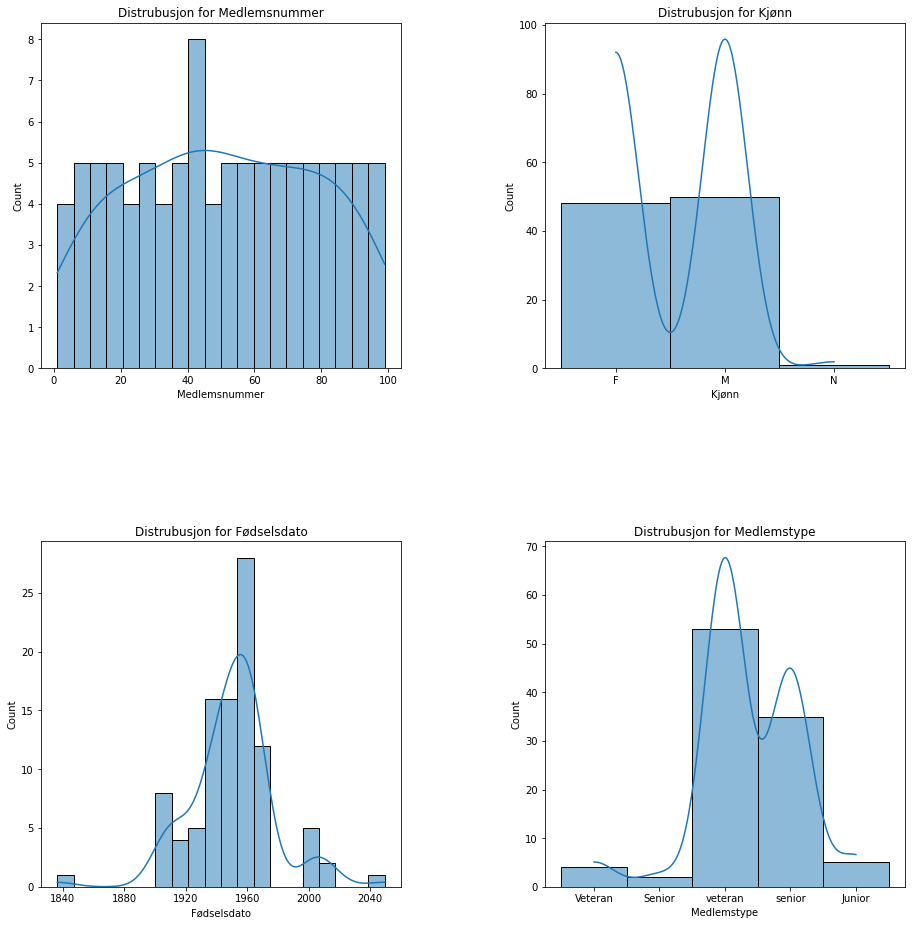

In [5]:
def plot_dist_box(df, column_names, dist=True, box=False):
    plt.figure(figsize=(15,15))
    
    for i in range(0, len(column_names)):
        plt.subplot(2, 2, i+1)
        if dist:
            sns.histplot(df[column_names[i]], bins=20, kde=True)
        if box:
            sns.boxplot(df[column_names[i]])
        plt.title('Distrubusjon for {0}'.format(column_names[i]))
        
    plt.tight_layout()
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)
    plt.show()
    
    
kolonner = ['Medlemsnummer', 'Kjønn', 'Fødselsdato', 'Medlemstype']
plot_dist_box(medlemmer_data, kolonner)

#### Kjønn og kontingent

In [6]:
medlemmer_data['Kjønn'].unique()

array(['F', 'M', 'N'], dtype=object)

Datasettet viser tydelig at det er tre forskjellige kjønnskategorier:

* Female (F)
* Male (M)
* Neutral (N)

Imidlertid står det ingen oppføringer for hvilken kontingent som gjelder for en person som identifiserer seg som nøytral (N).

In [7]:
N_kjonn = pd.DataFrame(medlemmer_data[medlemmer_data['Kjønn']=='N'])
N_kjonn['Feil/Mangel'] = 'Kontingent for Kjønn (N)'
N_kjonn

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Medlemstype,Gateadresse,Postnummer,Poststed,Feil/Mangel
44,29,Einar,IVERSEN,2005-09-10,N,Junior,Hanshusvangen,6281,Søvik,Kontingent for Kjønn (N)


#### Sjekking for data redundans 

In [8]:
medlemmer_data.duplicated().sum()

0

Det virker som om hver rad har unike verdier i ulike kolonner. Med andre ord, ingen rader i medlemsregisteret er helt like.

In [9]:
medlemmer_data['Medlemsnummer'].duplicated().sum()

3

Det er tre medlemmer som deler det samme **Medlemsnummeret**. Dette bør være unikt for hvert medlem og indikere en feil i datasettet.

In [10]:
dupliserte_medlemsnummer_verdier = pd.DataFrame(medlemmer_data[medlemmer_data['Medlemsnummer'].duplicated()])
dupliserte_medlemsnummer_verdier

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Medlemstype,Gateadresse,Postnummer,Poststed
59,42,Ludvig,LARSEN,1908-02-08,M,veteran,Frendstadgjelen,6065,Ulsteinvik
80,42,Hansd,RASMUSSEN,1947-02-19,M,senior,Støa,6639,Torvikbukt
86,42,Karl,SOLBERG,1941-09-10,M,veteran,Storinnsjøveien,6390,Vestnes


Det ser ut til at Ludvig LARSEN, Hansd RASMUSSEN og Karl SOLBERG har det samme **Medlemsnummeret**. For å opprettholde orden og sikre at hvert **Medlemsnummer** er unikt, bør disse endres. Dette antar jeg, med mindre nummereringen av medlemmer følger en annen ordning, for eksempel nivåer.

In [11]:
ubrukte_medlemsnummer = [i for i in range(1, 100) if i not in sorted(medlemmer_data['Medlemsnummer'].unique())]
ubrukte_medlemsnummer

[4, 21, 32]

#### Sjekking for manglende verdier 

In [12]:
medlemmer_data.isna().sum()

Medlemsnummer    0
Fornavn          0
Etternavn        1
Fødselsdato      1
Kjønn            0
Medlemstype      0
Gateadresse      0
Postnummer       0
Poststed         1
dtype: int64

Det ser ut til at det mangler verdier i kolonnene **Etternavn**, **Fødselsdato** og **Poststed** for enkelte rader.

In [13]:
medlemmer_med_manglende_verdier = pd.DataFrame(medlemmer_data[medlemmer_data.isnull().any(axis=1)])
medlemmer_med_manglende_verdier.loc[98, 'Feil/Mangel'] = 'Etternavn og Poststed'
medlemmer_med_manglende_verdier.loc[50, 'Feil/Mangel'] = 'Fødselsdato'
medlemmer_med_manglende_verdier

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Medlemstype,Gateadresse,Postnummer,Poststed,Feil/Mangel
50,2,Johan,JOHANSEN,NaT,M,veteran,Børliveien,6051,Valderøy,Fødselsdato
98,90,Marie,NaN,1964-08-12,F,senior,Myrvangveien,6601,NaN,Etternavn og Poststed


For **Medlemsnummer** 90, hvor både **Etternavn** og **Poststed** mangler, kan det være verdt å undersøke muligheten for å komme i kontakt med dette medlemmet eller gjennomføre en etterforskning for å finne disse verdiene. Dette vil bidra til å fylle ut datasettet og gjøre det mer komplett.

Når det gjelder **Medlemsnummer** 50, er det oppgitt at **Fødselsdato** mangler. Imidlertid er denne informasjonen tilgjengelig i det opprinnelige datasettet, men den er registrert som 14.14.1908, noe som ikke er en gyldig dato da det ikke finnes en 14. måned. Dette fører til at den blir registrert som NaT (Not a Time) ved konvertering til datotid-format.

#### Kategorisering av Medlemstype

In [14]:
medlemmer_data['Medlemstype'].unique()

array(['Veteran', 'Senior', 'veteran', 'senior', 'Junior'], dtype=object)

Det er to forskjellige verdier for **Veteran** og to for **Senior**. Det er viktig å være oppmerksom på forskjellen mellom store og små bokstaver. En slik ubalanse i datasettet bør adresseres før det sendes videre, eller informasjon om dette bør formidles videre.

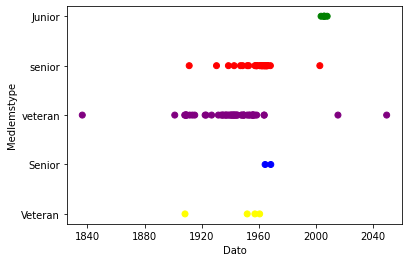

In [15]:
plt.scatter(medlemmer_data['Fødselsdato'], medlemmer_data['Medlemstype'], 
            c=medlemmer_data['Medlemstype'].map({'Veteran': 'yellow', 'Senior': 'blue', 'Junior': 'green', 
                                                 'senior':'red', 'veteran':'purple'}))
plt.xlabel('Dato')
plt.ylabel('Medlemstype')
plt.title('')
plt.show()

In [16]:
fødsel_etter_2024 = pd.DataFrame(medlemmer_data[medlemmer_data['Fødselsdato'] > '2024'])
fødsel_etter_2024['Feil/Mangel'] = 'Fødsesldato'
fødsel_etter_2024

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Medlemstype,Gateadresse,Postnummer,Poststed,Feil/Mangel
12,48,Magnus,BAKKE,2049-06-22,M,veteran,Skåret,6686,Valsøybotn,Fødsesldato


Basert på plottet ser det ut til at Magnus er en uteligger i datasettet, da fødselsdatoen er oppført som 2049-06-22. Videre kan det også observeres fra plottet at det er flere personer som er feilkategorisert. Ifølge reglene for medlemstype skulle disse kategoriene vært tildelt som følger:

- Alder 18-60: Senior
- Alder 10-17: Junior
- Alder 60+: Veteran

### Datarensing 

#### Separering av data

In [17]:
data_med_mangel_eller_feil = pd.concat([fødsel_etter_2024, medlemmer_med_manglende_verdier, N_kjonn])
data_med_mangel_eller_feil

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Medlemstype,Gateadresse,Postnummer,Poststed,Feil/Mangel
12,48,Magnus,BAKKE,2049-06-22,M,veteran,Skåret,6686,Valsøybotn,Fødsesldato
50,2,Johan,JOHANSEN,NaT,M,veteran,Børliveien,6051,Valderøy,Fødselsdato
98,90,Marie,NaN,1964-08-12,F,senior,Myrvangveien,6601,NaN,Etternavn og Poststed
44,29,Einar,IVERSEN,2005-09-10,N,Junior,Hanshusvangen,6281,Søvik,Kontingent for Kjønn (N)


In [18]:
data_uten_mangel = medlemmer_data.drop(index=data_med_mangel_eller_feil.index)

Denne dataen med feil eller mangel separer jeg fra datasettet, siden det bør rettes opp eller undersøkes mer før videre behandling. 

### Tildeling av unike medlemsnummer

Siden det er dupliserte medlemsverdier i datasettet vil jeg tildele ubrukte medlemsnummer [4, 21, 32] til de medlemmene som har samme like medlemsnummer.

In [19]:
data_uten_mangel[data_uten_mangel['Medlemsnummer'].duplicated()]

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Medlemstype,Gateadresse,Postnummer,Poststed
59,42,Ludvig,LARSEN,1908-02-08,M,veteran,Frendstadgjelen,6065,Ulsteinvik
80,42,Hansd,RASMUSSEN,1947-02-19,M,senior,Støa,6639,Torvikbukt
86,42,Karl,SOLBERG,1941-09-10,M,veteran,Storinnsjøveien,6390,Vestnes


In [20]:
dupliserte_medlemsnummer_verdier['Medlemsnummer'] = ubrukte_medlemsnummer
dupliserte_medlemsnummer_verdier

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Medlemstype,Gateadresse,Postnummer,Poststed
59,4,Ludvig,LARSEN,1908-02-08,M,veteran,Frendstadgjelen,6065,Ulsteinvik
80,21,Hansd,RASMUSSEN,1947-02-19,M,senior,Støa,6639,Torvikbukt
86,32,Karl,SOLBERG,1941-09-10,M,veteran,Storinnsjøveien,6390,Vestnes


In [21]:
# Dropper de eldre dupliserte verdiene basert på index.
data_uten_mangel = data_uten_mangel.drop(index=dupliserte_medlemsnummer_verdier.index)
data_uten_mangel[data_uten_mangel['Medlemsnummer'].duplicated()]

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Medlemstype,Gateadresse,Postnummer,Poststed


Nå ser vi at de dupliserte medlemmene er borte. 

In [22]:
# Kombinerer datasettet med medlemmene som har fått tildelt et nytt medlemsnummer.
data_uten_mangel = pd.concat([data_uten_mangel, dupliserte_medlemsnummer_verdier])
data_uten_mangel['Medlemsnummer'].duplicated().sum()

0

Nå kan det observeres at det er ingen i datasettet som har like medlemsnummer.

#### Fiksing av kategorisering for Medlemstype

In [23]:
# Fjerner bort skille mellom veteran og Veteran og Senior og senior.
data_uten_mangel['Medlemstype'] = data_uten_mangel['Medlemstype'].str.capitalize()
data_uten_mangel

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Medlemstype,Gateadresse,Postnummer,Poststed
0,62,Sahra,AAS,1957-03-28,F,Veteran,Nytrøa,6166,Sæbø
1,87,Hanne,AASEN,1964-05-22,F,Senior,Krokveien,6399,Vestnes
2,99,Solveig,ABRAHAMSEN,1968-05-08,F,Senior,Langsæterlia,6687,Valsøyfjorden
3,71,Karen,AHMED,1960-07-23,F,Veteran,Rødalsveien,6239,Sykkylven
4,52,Emma,ALI,1951-11-05,F,Veteran,Sottdalen,6051,Valderøy
...,...,...,...,...,...,...,...,...,...
96,97,Anne,TVEIT,1968-01-30,F,Senior,Skibakkveien,6683,Vågland
97,78,Åse,VIK,1962-06-25,F,Senior,Svartberget,6280,Søvik
59,4,Ludvig,LARSEN,1908-02-08,M,Veteran,Frendstadgjelen,6065,Ulsteinvik
80,21,Hansd,RASMUSSEN,1947-02-19,M,Senior,Støa,6639,Torvikbukt


In [24]:
# 1964 - 2006 Senior
# 2007 - 2014 Junior
# 1700 - 1963 Veteran


def bursdags_krav(aldersgruppe):
    idag = pd.to_datetime(date.today())
    start, slutt = aldersgruppe 
    start_aar_siden = idag - pd.DateOffset(years=start)
    slutt_aar_siden = idag - pd.DateOffset(years=slutt)
    return start_aar_siden, slutt_aar_siden
    
    
Senior_gruppe = [18, 60]
Junior_gruppe = [10, 17]
Veteran_gruppe = [61, 62]

atten_aar_siden, seksti_aar_siden = bursdags_krav(Senior_gruppe)

Senior_krav = data_uten_mangel[((data_uten_mangel['Fødselsdato'] <= atten_aar_siden) &
              (data_uten_mangel['Fødselsdato'] >= seksti_aar_siden))].index
                

ti_aar_siden, sytten_aar_siden = bursdags_krav(Junior_gruppe)

Junior_krav = data_uten_mangel[((data_uten_mangel['Fødselsdato'] <= ti_aar_siden) & 
                (data_uten_mangel['Fødselsdato'] >= sytten_aar_siden))].index

mer_enn_sekti_aar, _ = bursdags_krav(Veteran_gruppe)
Veteran_krav = data_uten_mangel[data_uten_mangel['Fødselsdato'] <= mer_enn_sekti_aar].index

ingen_krav = data_uten_mangel[(data_uten_mangel['Fødselsdato'] >= ti_aar_siden)].index



data_uten_mangel.loc[Senior_krav.to_list(), 'Medlemstype'] = 'Senior'
data_uten_mangel.loc[Junior_krav.to_list(), 'Medlemstype'] = 'Junior'
data_uten_mangel.loc[Veteran_krav.to_list(), 'Medlemstype'] = 'Veteran'
data_uten_mangel.loc[ingen_krav.to_list(), 'Medlemstype'] = 'Ingen Gruppe'
data_uten_mangel

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Medlemstype,Gateadresse,Postnummer,Poststed
0,62,Sahra,AAS,1957-03-28,F,Veteran,Nytrøa,6166,Sæbø
1,87,Hanne,AASEN,1964-05-22,F,Senior,Krokveien,6399,Vestnes
2,99,Solveig,ABRAHAMSEN,1968-05-08,F,Senior,Langsæterlia,6687,Valsøyfjorden
3,71,Karen,AHMED,1960-07-23,F,Veteran,Rødalsveien,6239,Sykkylven
4,52,Emma,ALI,1951-11-05,F,Veteran,Sottdalen,6051,Valderøy
...,...,...,...,...,...,...,...,...,...
96,97,Anne,TVEIT,1968-01-30,F,Senior,Skibakkveien,6683,Vågland
97,78,Åse,VIK,1962-06-25,F,Veteran,Svartberget,6280,Søvik
59,4,Ludvig,LARSEN,1908-02-08,M,Veteran,Frendstadgjelen,6065,Ulsteinvik
80,21,Hansd,RASMUSSEN,1947-02-19,M,Veteran,Støa,6639,Torvikbukt


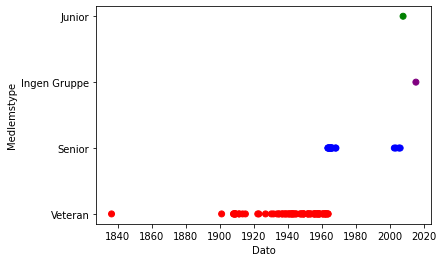

In [25]:
plt.scatter(data_uten_mangel['Fødselsdato'], data_uten_mangel['Medlemstype'], c=data_uten_mangel['Medlemstype'].map({'Veteran': 'red', 'Senior': 'blue', 'Junior': 'green', 'Ingen Gruppe': 'purple'}))
plt.xlabel('Dato')
plt.ylabel('Medlemstype')
plt.title('')
plt.show()

Basert på plottet, ser det ut til at det fortsatt er en person i datasettet som ikke passer inn i noen av de definerte aldersgruppene. Dette skyldes trolig at vedkommende er under 10 år gammel. Videre kan det nevnes at personer født før 1840 også kan være potensielle avvikere i datasettet. Det er imidlertid verdt å merke seg at Statens Pensjonskasse (SPK) ble etablert i 1917, og det er mulig at medlemskap i SPK kunne gi fordeler til familiene til medlemmene etter deres død. Derfor er det usikkert om personer født før 1840 nødvendigvis er avvikere eller om de kan ha tilhørt en slik medlemsgruppe med tilknyttede fordeler.

In [26]:
mangler_medlemtype = pd.DataFrame(data_uten_mangel[(data_uten_mangel['Fødselsdato'] >= ti_aar_siden)])
mangler_medlemtype['Feil/Mangel'] = 'Medlemstype'
mangler_medlemtype

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Medlemstype,Gateadresse,Postnummer,Poststed,Feil/Mangel
39,65,Sara,HAUGLAND,2015-05-16,F,Ingen Gruppe,Sparsjøvollveien,6201,Stranda,Medlemstype


In [27]:
data_med_mangel_eller_feil = pd.concat([data_med_mangel_eller_feil, mangler_medlemtype])
data_med_mangel_eller_feil

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Medlemstype,Gateadresse,Postnummer,Poststed,Feil/Mangel
12,48,Magnus,BAKKE,2049-06-22,M,veteran,Skåret,6686,Valsøybotn,Fødsesldato
50,2,Johan,JOHANSEN,NaT,M,veteran,Børliveien,6051,Valderøy,Fødselsdato
98,90,Marie,NaN,1964-08-12,F,senior,Myrvangveien,6601,NaN,Etternavn og Poststed
44,29,Einar,IVERSEN,2005-09-10,N,Junior,Hanshusvangen,6281,Søvik,Kontingent for Kjønn (N)
39,65,Sara,HAUGLAND,2015-05-16,F,Ingen Gruppe,Sparsjøvollveien,6201,Stranda,Medlemstype


In [28]:
data_uten_mangel = data_uten_mangel.drop(index=mangler_medlemtype.index)
len(data_uten_mangel)

94

#### Dato til orginal format

In [29]:
data_uten_mangel['Fødselsdato'] = data_uten_mangel['Fødselsdato'].dt.strftime('%d.%m.%Y')
data_uten_mangel

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Medlemstype,Gateadresse,Postnummer,Poststed
0,62,Sahra,AAS,28.03.1957,F,Veteran,Nytrøa,6166,Sæbø
1,87,Hanne,AASEN,22.05.1964,F,Senior,Krokveien,6399,Vestnes
2,99,Solveig,ABRAHAMSEN,08.05.1968,F,Senior,Langsæterlia,6687,Valsøyfjorden
3,71,Karen,AHMED,23.07.1960,F,Veteran,Rødalsveien,6239,Sykkylven
4,52,Emma,ALI,05.11.1951,F,Veteran,Sottdalen,6051,Valderøy
...,...,...,...,...,...,...,...,...,...
96,97,Anne,TVEIT,30.01.1968,F,Senior,Skibakkveien,6683,Vågland
97,78,Åse,VIK,25.06.1962,F,Veteran,Svartberget,6280,Søvik
59,4,Ludvig,LARSEN,08.02.1908,M,Veteran,Frendstadgjelen,6065,Ulsteinvik
80,21,Hansd,RASMUSSEN,19.02.1947,M,Veteran,Støa,6639,Torvikbukt


In [30]:
data_med_mangel_eller_feil['Fødselsdato'] = data_med_mangel_eller_feil['Fødselsdato'].dt.strftime('%d.%m.%Y')
data_med_mangel_eller_feil

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Medlemstype,Gateadresse,Postnummer,Poststed,Feil/Mangel
12,48,Magnus,BAKKE,22.06.2049,M,veteran,Skåret,6686,Valsøybotn,Fødsesldato
50,2,Johan,JOHANSEN,NaN,M,veteran,Børliveien,6051,Valderøy,Fødselsdato
98,90,Marie,NaN,12.08.1964,F,senior,Myrvangveien,6601,NaN,Etternavn og Poststed
44,29,Einar,IVERSEN,10.09.2005,N,Junior,Hanshusvangen,6281,Søvik,Kontingent for Kjønn (N)
39,65,Sara,HAUGLAND,16.05.2015,F,Ingen Gruppe,Sparsjøvollveien,6201,Stranda,Medlemstype


#### Kontingent 

In [31]:
def kontingent_betingelser(periode, data):
    kontingent_data_periode = pd.DataFrame(kontingent_data[kontingent_data['Kontingentperiode']==periode])
    kontingent_mapping = kontingent_data_periode.set_index(['Medlemstype', 'Kjønn'])['Kontingent']
    data['Kontingent'] = data.apply(lambda row: kontingent_mapping.get((row['Medlemstype'], 
                                                         row['Kjønn'])), axis=1)
    return data

In [32]:
# Kontingent for periode 2020.
medlemmer_kontingent2020 = pd.DataFrame(kontingent_betingelser(2020, data_uten_mangel))
medlemmer_kontingent2020

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Medlemstype,Gateadresse,Postnummer,Poststed,Kontingent
0,62,Sahra,AAS,28.03.1957,F,Veteran,Nytrøa,6166,Sæbø,750
1,87,Hanne,AASEN,22.05.1964,F,Senior,Krokveien,6399,Vestnes,900
2,99,Solveig,ABRAHAMSEN,08.05.1968,F,Senior,Langsæterlia,6687,Valsøyfjorden,900
3,71,Karen,AHMED,23.07.1960,F,Veteran,Rødalsveien,6239,Sykkylven,750
4,52,Emma,ALI,05.11.1951,F,Veteran,Sottdalen,6051,Valderøy,750
...,...,...,...,...,...,...,...,...,...,...
96,97,Anne,TVEIT,30.01.1968,F,Senior,Skibakkveien,6683,Vågland,900
97,78,Åse,VIK,25.06.1962,F,Veteran,Svartberget,6280,Søvik,750
59,4,Ludvig,LARSEN,08.02.1908,M,Veteran,Frendstadgjelen,6065,Ulsteinvik,850
80,21,Hansd,RASMUSSEN,19.02.1947,M,Veteran,Støa,6639,Torvikbukt,850


In [33]:
# Kontingent for periode 2021.
medlemmer_kontingent2021 = pd.DataFrame(kontingent_betingelser(2021, data_uten_mangel))
medlemmer_kontingent2021

,Medlemsnummer,Fornavn,Etternavn,Fødselsdato,Kjønn,Medlemstype,Gateadresse,Postnummer,Poststed,Kontingent
0,62,Sahra,AAS,28.03.1957,F,Veteran,Nytrøa,6166,Sæbø,700
1,87,Hanne,AASEN,22.05.1964,F,Senior,Krokveien,6399,Vestnes,850
2,99,Solveig,ABRAHAMSEN,08.05.1968,F,Senior,Langsæterlia,6687,Valsøyfjorden,850
3,71,Karen,AHMED,23.07.1960,F,Veteran,Rødalsveien,6239,Sykkylven,700
4,52,Emma,ALI,05.11.1951,F,Veteran,Sottdalen,6051,Valderøy,700
...,...,...,...,...,...,...,...,...,...,...
96,97,Anne,TVEIT,30.01.1968,F,Senior,Skibakkveien,6683,Vågland,850
97,78,Åse,VIK,25.06.1962,F,Veteran,Svartberget,6280,Søvik,700
59,4,Ludvig,LARSEN,08.02.1908,M,Veteran,Frendstadgjelen,6065,Ulsteinvik,800
80,21,Hansd,RASMUSSEN,19.02.1947,M,Veteran,Støa,6639,Torvikbukt,800


#### Skriving av data til fil

In [34]:
fil_navn = 'Behandlet data/Løsningsett-Datagrunnlag medlemsregister og kontingent.xlsx'
with pd.ExcelWriter(fil_navn) as writer:
    medlemmer_kontingent2020.to_excel(writer, sheet_name='Medlemmer med kontingent 2020', index=False)
    medlemmer_kontingent2021.to_excel(writer, sheet_name='Medlemmer med kontingent 2021', index=False)
    data_med_mangel_eller_feil.to_excel(writer, sheet_name='Data med Feil eller Mangel', index=False)

## Del 2 (Personlige egenskaper)

##### Tenker analytisk: 

Evnen til å se helheten i datasettet og forstå sammenhenger er avgjørende for å trekke meningsfulle konklusjoner og identifisere mønstre eller anomalier.

##### Feilsøkingsferdigheter: 
Evnen til å identifisere og løse problemer eller feil i datasettet bidrar til å opprettholde datakvalitet og nøyaktighet.

##### Øye for detaljer: 
Å legge merke til små avvik eller feil i datasettet kan bidra til å forbedre datakvaliteten og sikre nøyaktigheten i analyser og beslutninger som baseres på dataene.

##### Teknologisk kompetanse og erfaring:
Å ha kunnskap om og erfaring med relevant teknologi og verktøy for dataanalyse og datamanipulasjon kan bidra til å effektivisere arbeidsprosesser og løse oppgaver mer effektivt.

##### Åpen for diskusjon og nyttige perspektiver: 
Evnen til å samarbeide med andre og være åpen for å diskutere løsninger kan bidra til å utvide perspektiver og finne mer robuste løsninger på utfordringer.

##### Lærevillig: 
Villigheten til å lære og stadig forbedre seg er viktig i et felt som dataanalyse, hvor det stadig utvikles nye verktøy og metoder.